# Decision Trees

Observe the same example from previous example (Iris dataset) with decision trees.

<center>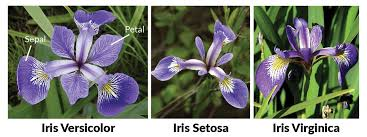</center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_countour(depth = 2):
   
    iris = load_iris()
    X = iris.data[:, 2:] # petal length and width
    y = iris.target

    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X, y)

    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=20)


    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right')

# Decision Trees Features

 * Simple understanding
 * Such models are often called white box models
 * In Contrast, Random Forests or neural networks are generally considered black box models
 * Little data preparation
     * No Scaling
     * No Centering

# Load and examine iris dataset

In [3]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

# Play around the dataset

In [4]:
#print(iris.keys())
#print(iris.DESCR)
#print(iris.feature_names)
#print(iris.target_names)

# Fit decision tree model

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
petal_size = 6
petal_width = 1.2

tree_clf.predict([[petal_size, petal_width]])

array([1])

# Let’s see the tree

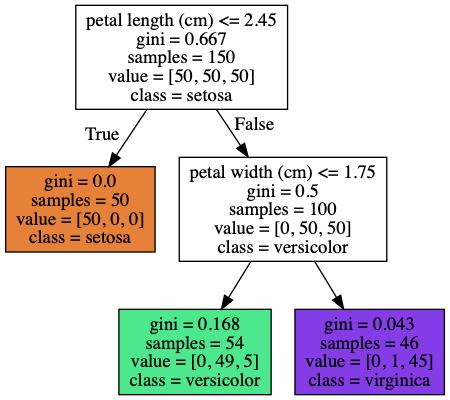

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(
    tree_clf, out_file=dot_data, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Check out contour plot

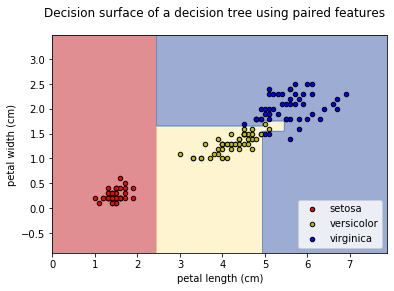

In [30]:
plot_countour(1000)

# Estimating Class Probabilities

Decision Trees can also estimate the probability that an instance belongs to a particular class $k$

In [33]:
petal_size = 0.1
petal_width = 0.9

probs = tree_clf.predict_proba([[petal_size, petal_width]])

[[1. 0. 0.]]


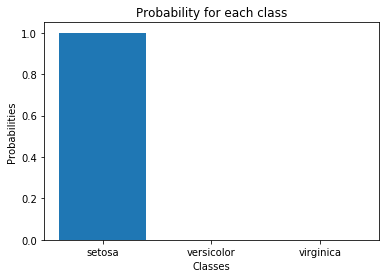

In [34]:
values = probs[0]
plt.bar(iris.target_names, values)
plt.title("Probability for each class")

plt.xlabel("Classes")
plt.ylabel("Probabilities")
print(probs)

# Gini impurity

Measures the impurity of a given atttribute.

``` 
if gini(node) = 0 then node is pure
if gini(node) close to 1 then node is impure
```

\begin{equation}G_i = 1 - \sum_{k =1}^{n}p_{i,k}^2\end{equation}

Where:
* $G_1$ is the ginni impurity factor
* $p_{i, k}$ is the ration of class k instances among the training instances in the $i^{th}$ node.

# Gini impurity

Example gini impurity calculation for class versicolor Node

\begin{equation}G_i = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \end{equation}

In [37]:
# [50, 0, 0]
g_1 = 1-(50/50)**2-(0/50)**2-(0/50)**2
g_1

0.0

# CART Training Algorithm

* The algorithm first splits the training set in two subsets using a single feature $k$ and a threshold $t_k$ 
* It searches for the pair $(k, t_k)$ that produces the purest subset using Gini metric.

Cost Function

$$J\left(k, t_{k}\right)=\frac{m_{\mathrm{left}}}{m} G_{\mathrm{left}}+\frac{m_{\mathrm{right}}}{m} G_{\mathrm{right}}$$

Where:

* $G_{\mathrm{left/right}}$ measures the impurity of subsets.
* $m_{\mathrm{left/right}}$ is the number of instances of  subsets.
* $m$ total numbe of samples

# Implementing CART cost function

In [12]:
def split_sets(dataset, feature, threshold):
    """
    Return the indexes of dataset below and higher the
    threshold.
    """
    # Calculate the index of feature
    feature_index = dataset.feature_names.index(feature)

    # Evaluate left set
    left_set = set(
        [
            index
            for index, entry in enumerate(dataset.data)
            if entry[feature_index] <= threshold
        ]
    )

    # Calculate the right set by complement
    complete_set = set(range(len(dataset.data)))
    right_set = complete_set - left_set

    return left_set, right_set

#split_sets(iris, 'petal length (cm)', 1.4)

# Implementing Gini Function

In [13]:
def gini(dataset, nodeset):

    labels = [dataset.target[i] for i in nodeset]

    # Counts labels in dataset
    counts = [
        labels.count(index) / len(nodeset)
        for index, label in enumerate(dataset.target_names)
    ]

    G = 1 - np.sum([count**2 for count in counts])
    return G

# Implementing Gini Function

In [14]:
def calculate_cost(dataset, feature, threshold):
    # Divide dataset 
    
    left_set, right_set = split_sets(
        dataset, feature, threshold
    )
    gini_left = gini(dataset, left_set)
    gini_right = gini(dataset, right_set)

    total_len = len(left_set) + len(right_set)
    J = gini_left*len(left_set)/total_len + gini_right*len(right_set)/total_len
    return J

In [15]:
#def calculate_cost(dataset, feature)
dataset = iris
feature = 'petal length (cm)'
threshold = 2.45
calculate_cost(dataset, feature, threshold)

0.3333333333333333

# Check Implementation

In [16]:
dataset = iris
feature = 'petal length (cm)'
threshold = 2.45

left_set, right_set = split_sets(iris, feature, threshold)
gini(iris, right_set), gini(iris, left_set), calculate_cost(dataset, feature, threshold)

(0.5, 0.0, 0.3333333333333333)

# Check Implementation

Text(0, 0.5, 'Probabilities')

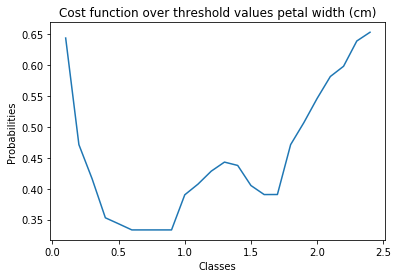

In [17]:
dataset = iris
feature = 'petal width (cm)'
step = 0.1

# Find index of feature
feature_index = dataset.feature_names.index(feature)

# Evaluate min and max of values
feature_min = min(dataset.data[:, feature_index])
feature_max = max(dataset.data[:, feature_index])

# Range of possible thresholds
featrange = np.arange(feature_min, feature_max, step)

costs = [
    calculate_cost(dataset, feature, threshold)
    for threshold in featrange
]

plt.plot(featrange, costs)
plt.title(f"Cost function over threshold values {feature}")
plt.xlabel("Classes")
plt.ylabel("Probabilities")

In [18]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Regression with Decision Trees

* Decision Trees are also capable of performing regression
* In other words, they are capable of predicting values instead of classes

# Lets build a regression decision tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
print(iris.feature_names[2:])
tree_reg.predict([[2.46, 1.8]]), 

['petal length (cm)', 'petal width (cm)']


(array([1.97826087]),)

# Visualizing a regression decision tree

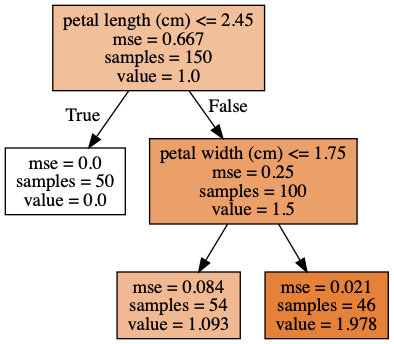

In [21]:
dot_data = StringIO()

export_graphviz(
    tree_reg, out_file=dot_data, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# CART Algorithm

$$J\left(k, t_{k}\right)=\frac{m_{\mathrm{left}}}{m} \mathrm{MSE}_{\mathrm{left}}+\frac{m_{\mathrm{right}}}{m} \mathrm{MSE}_{\mathrm{right}}$$

$$\text { where }\left\{\begin{array}{l}
\operatorname{MSE}_{\text {node }}=\sum_{i \in \text { node }}\left(\hat{y}_{\text {node }}-y^{(i)}\right)^{2} \\
\hat{y}_{\text {node }}=\frac{1}{m_{\text {node }}} \sum_{i \in \text { node }} y^{(i)}
\end{array}\right.$$

MSE stands for **Mean Squared Error**

# Exercise

Implement CART for Regression and classification

# Further Reading

* https://towardsdatascience.com/decision-tree-overview-with-no-maths-66b256281e2b
* https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
* https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/